In [1]:
import networkx as net
import matplotlib.pyplot as plot
egypts_file = "data/egypt_retweets.net"

## Number of nodes in the network

In [2]:
egypts = net.read_pajek(egypts_file)
len(egypts)

25178

## Components in the network

In [3]:
ccsubg = [cc for cc in net.connected_component_subgraphs(egypts)]
len(ccsubg)

3122

In [7]:
# connected_components_subgraphs is deprecated
ccsg = [egypts.subgraph(cc) for cc in net.connected_components(egypts)]
len(ccsg)

3122

## Size of Top-5 Components

In [4]:
ccsubg_l = [len(cc) for cc in ccsubg]
ccsubg_l.sort(reverse=True)
ccsubg_l[:5]

[17762, 64, 16, 16, 14]

In [5]:
def trim_edges(g, weight=1):
    g2 = net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, **edata)
    return g2

In [6]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    # Compute the size of the step
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

In [22]:
g1 = trim_edges(egypts, 5)
len(g1)

6067

In [7]:
example_cn = next(net.connected_components(egypts))
example_cn

{'tammamalghraoui',
 'SamShakespear',
 'WVRQ_Q102',
 'randatoukan',
 'hanan_ahmed22',
 'guardiannews',
 'Elghanai',
 'MegiMargi',
 'chiheb12',
 'ladyBaghdady',
 'alshayal',
 'mado3bhady',
 'felacton',
 'GattoGialloNews',
 'F0RTHWARD',
 'RumsfeldOffice',
 'averyps',
 'harishpillay',
 'crisprodrigues',
 'semsem',
 'alan_125',
 'abu_yqdan',
 'TamerELG',
 'Ian_Fraser',
 'Sa3dTalaat',
 'priyowibowo',
 'ZeinabSamir',
 'raye7wmishraj3',
 'faisal1624',
 'algeria',
 'hindmourad',
 'NerminTammam',
 'missmayse',
 'hangcat',
 'Disco_Labirinto',
 'carbeye',
 'souzifrancis',
 'nologo_foto',
 'BreatheDreamGo',
 'naomigingold',
 'chrisothailand',
 'sydiot',
 'Victoria_cars',
 'toni_miedes',
 'craigcatt',
 '_Dinner',
 'MaisaraGad',
 'AllisonKind',
 'rabayl_m',
 'mwabooth',
 'REReports',
 'masreyah',
 'SarmounSufi',
 'kama38',
 'angelaperry',
 'clownfish79',
 'rachelmaddow',
 'MacBerry',
 'AlterEgoAdey',
 'theonetruebix',
 'matthewme23',
 'BassoonistPaul',
 'abdelrahmanG',
 'ThatTVBlogger',
 'denspw',
 

In [8]:
egypts.subgraph?

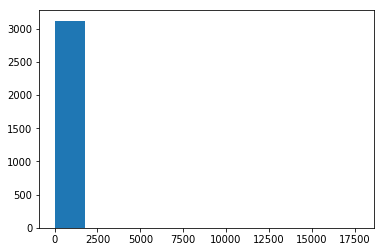

In [7]:
x = [len(cc) for cc in ccsubg]
y = plot.hist(x)

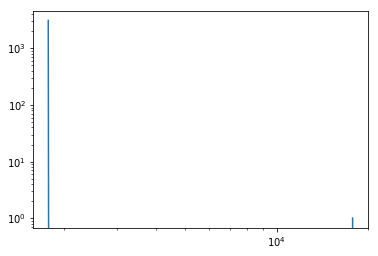

In [7]:
plot.loglog(y[1][1:], y[0])

In [8]:
i = [len(cc) for cc in ccsubg if len(cc) > 10]
i

[17762, 64, 16, 13, 11, 11, 14, 16]

In [25]:
y[1]

array([1.00000000e+00, 1.18506667e+03, 2.36913333e+03, 3.55320000e+03,
       4.73726667e+03, 5.92133333e+03, 7.10540000e+03, 8.28946667e+03,
       9.47353333e+03, 1.06576000e+04, 1.18416667e+04, 1.30257333e+04,
       1.42098000e+04, 1.53938667e+04, 1.65779333e+04, 1.77620000e+04])

## Explore Island Method on largest component

In [14]:
# Get largest component. This happens to be the first component in ccsubg. 
# Add some more intelligence here...
bis = ccsubg[0]
# Apply Island Method on largest component
islands = island_method(bis)
# Check that bis is the largest component
len(bis)

17762

Threshold: 1, Number of nodes: 12360, Connected component subgraphs: 314
Threshold: 62, Number of nodes: 27, Connected component subgraphs: 11
Threshold: 123, Number of nodes: 8, Connected component subgraphs: 3
Threshold: 184, Number of nodes: 5, Connected component subgraphs: 2
Threshold: 245, Number of nodes: 5, Connected component subgraphs: 2


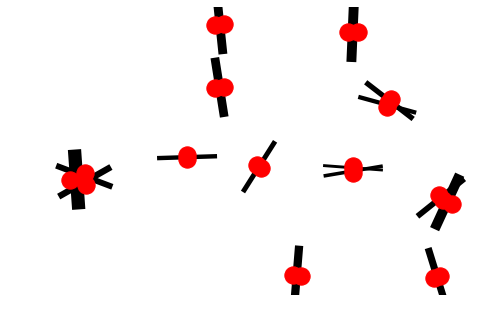

In [15]:
for i in islands:
    conncomp = [egypts.subgraph(cc) for cc in net.connected_components(i[1])]
    print("Threshold: {t}, Number of nodes: {l}, Connected component subgraphs: {cc}".format(t=i[0], 
                                                                                             l=len(i[1]),
                                                                                             cc=len(conncomp)))
    if i[0] == 62:
        attribs = dict(width=60)
        net.draw(i[1], **attribs)

In [16]:
fe = bis.edges(data=True)
cnt = 0
for fee in fe:
    print(fee[2]['weight'])
    cnt += 1
    if cnt > 10:
        break
    

3.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0


In [17]:
weights = [edata["weight"] for f, to, edata in egypts.edges(data=True)]
print("Min: {min} - Max: {max}".format(min=min(weights), max=max(weights)))

Min: 1.0 - Max: 306.0
